In [1]:
# Import libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sarracen as src
import numpy as np

/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/cubic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/quartic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/

# 3D Init Setup

In [2]:
n = 32*32*32
dm = 3.0517578125e-05
eta = 1.2 

In [3]:
sdf_ini = src.read_csv('../Data/initial_distribution/hydro32_00020.csv')
sdf_ini.params={'mass':dm, 'hfact':eta}
sdf_ini.calc_density()
sdf_ini

,x,y,z,vx,vy,vz,h,m,rho
0,0.900668,0.184204,0.108731,-2.593622,2.256404,2.567266,0.041070,0.000031,0.761235
1,0.944303,0.217114,0.137733,-2.818519,2.837712,3.304874,0.045177,0.000031,0.571913
2,0.002433,0.246422,0.151454,-2.223370,3.700157,2.261867,0.043559,0.000031,0.638076
3,0.065630,0.261394,0.145854,-1.692933,4.186088,0.410532,0.041286,0.000031,0.749346
4,0.132742,0.270060,0.135807,-0.574638,5.437574,-0.540051,0.042511,0.000031,0.686417
...,...,...,...,...,...,...,...,...,...
32763,0.843741,0.881597,0.077668,-5.755281,-5.038882,3.323175,0.036969,0.000031,1.043721
32764,0.855897,0.938685,0.082505,-4.617552,-3.349844,3.294612,0.041052,0.000031,0.762224
32765,0.870260,0.997155,0.097236,-3.428760,-1.964753,3.198069,0.038580,0.000031,0.918347
32766,0.892612,0.061304,0.118140,-2.618515,-0.220715,3.631402,0.038323,0.000031,0.936960


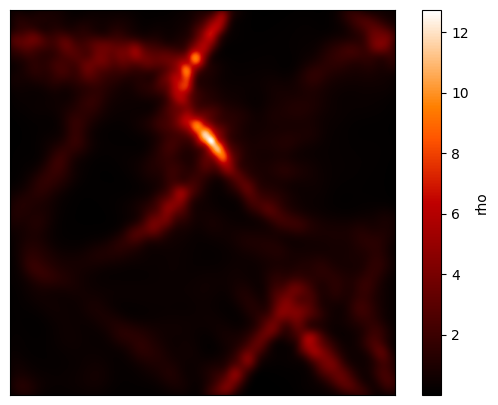

In [15]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf_ini.render('rho', xsec=0.5, ax=ax, rotation=[0,0,0])

# Final Setup

In [5]:
sdf = src.read_csv('../Data/results/turbulent_gas/final.csv')
sdf.params={'mass':dm, 'hfact':eta}
sdf.calc_density()
sdf

,x,y,z,vx,vy,vz,h,u,rho
0,0.891246,0.192323,0.118080,-2.457480,2.091936,2.447254,0.037761,2.001231,0.979386
1,0.933883,0.227373,0.149830,-2.785340,2.650682,3.180748,0.043822,1.831641,0.626649
2,0.993997,0.260034,0.159579,-2.354893,3.622488,2.080878,0.043253,1.492617,0.651708
3,0.059331,0.276577,0.147060,-1.700607,3.968679,0.214931,0.042328,1.145892,0.695338
4,0.130380,0.289939,0.133449,-0.727893,5.243721,-0.766722,0.042787,1.338590,0.673216
...,...,...,...,...,...,...,...,...,...
32763,0.822352,0.863316,0.089730,-5.760195,-4.761439,3.148663,0.034278,3.005206,1.309270
32764,0.838742,0.926711,0.094545,-4.672726,-3.026435,3.172085,0.038653,2.484348,0.913125
32765,0.857851,0.990003,0.109012,-3.263184,-1.860025,3.142305,0.036448,2.016472,1.089142
32766,0.883193,0.060481,0.131629,-2.436566,-0.217335,3.649451,0.035381,1.670262,1.190641


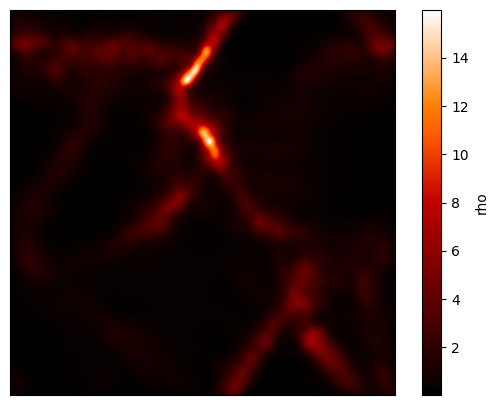

In [16]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf.render('rho', xsec=0.5, ax=ax, rotation=[0,0,0])

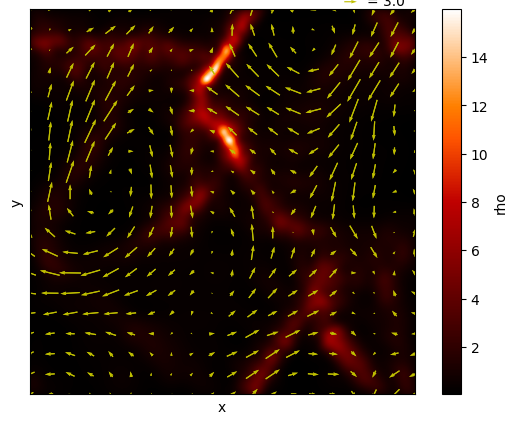

In [7]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf.render('rho', xsec=0.5, ax=ax, rotation=[0,0,0])
ax = sdf.arrowplot(['vx', 'vy', 'vz'], color='y')

# Final Setup

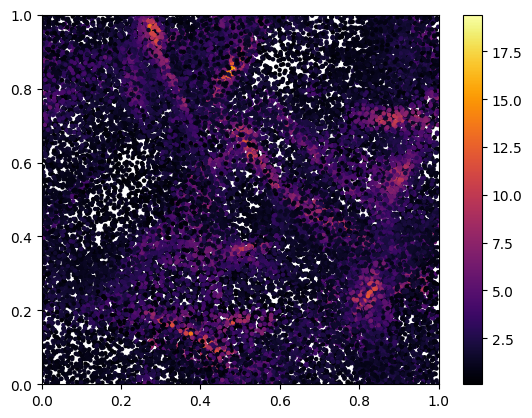

In [8]:
plt.scatter(sdf['x'], sdf['y'], c=sdf['rho'], cmap='inferno', s=5)
# Add a colorbar
plt.colorbar()
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

# Conservation's Laws

In [9]:
# Angular Momentum
def angular_momentum(x, y, z, vx, vy, vz):
    lx = y*vz - z*vy
    ly = z*vx - x*vz
    lz = x*vy - y*vx
    return lx, ly, lz

In [10]:
T = 15
time = range(0, T)
ang_mom = np.zeros(T)
lin_mom = np.zeros(T)
energ = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/sedov_blast_wave/' + str(ii) + ".csv")
    L = np.sum(angular_momentum(df['x'], df['y'], df['z'], df['vx'], df['vy'], df['vz']), axis=1)
    ang_mom[ii-1] = np.sqrt(L[0]*L[0] + L[1]*L[1] + L[2]*L[2])
    vx = np.sum(df['vx'])
    vy = np.sum(df['vy'])
    vz = np.sum(df['vz'])
    lin_mom[ii-1] = np.sqrt(vx*vx + vy*vy + vz*vz)
    energ[ii-1] = 0.5*lin_mom[ii-1] + np.sum(df['u'])

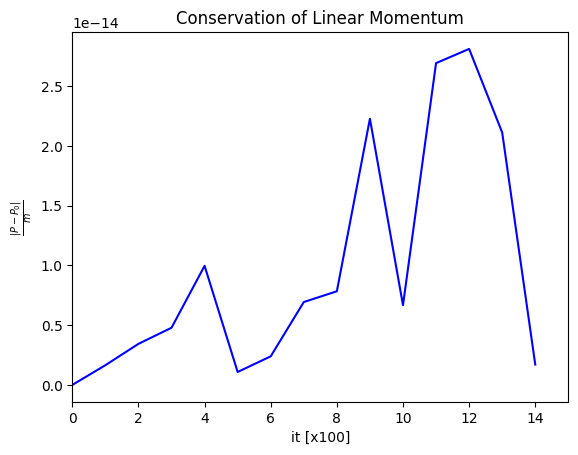

In [11]:
plt.plot(time[:], np.abs(lin_mom[:]-lin_mom[0]), '-', color='blue')
plt.title("Conservation of Linear Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\frac{|P-P_0|}{m}$")
plt.xlim(0, T)
plt.show()

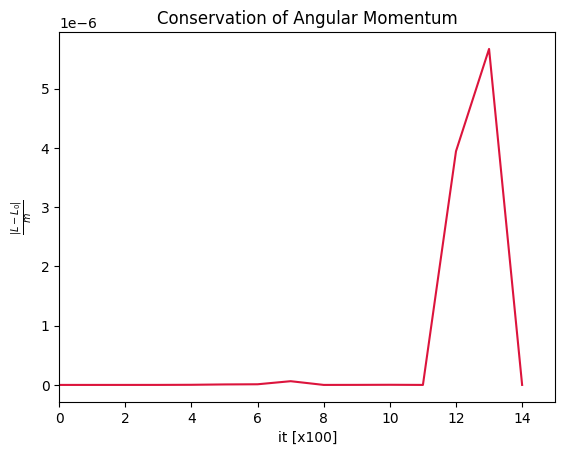

In [12]:
plt.plot(time[:], np.abs(ang_mom[:]-ang_mom[0]), '-', color='crimson')
plt.title("Conservation of Angular Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\frac{|L-L_0|}{m}$")
plt.xlim(0, T)
plt.show()

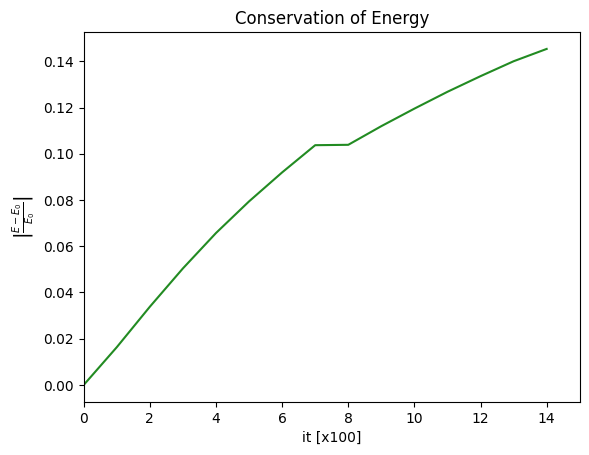

In [13]:
plt.plot(time[:], np.abs((energ[:]-energ[0])/energ[0]), '-', color='forestgreen')
plt.title("Conservation of Energy")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{E-E_0}{E_0}\right|$")
plt.xlim(0, T)
plt.show()

<Axes: xlabel='cross-section (x, y, z)', ylabel='rho'>

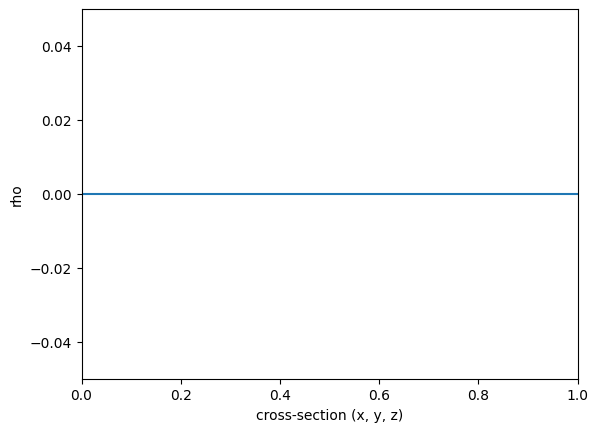

In [14]:
sdf.calc_density()
sdf.lineplot('rho', xlim=(-0.5, 0.5), ylim=-0.1875, zlim=0.0)